In [6]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import norm
%matplotlib inline

# getting know the data

In [7]:
tr = pd.read_csv('train.csv')

In [46]:
tr.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
tr.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [49]:
tr.shape

(891, 12)

In [50]:
tr.size

10692

regression problem: analyse the Data of using the Embarked port Data to predict the Fare ticket 
    
    
    
classification problem: Analyse the name of the passenger to predict which sex gender is (Male or Female)
    

    
clustering problem: using the data of ticket class, the passenger fare, the age of the passenger, we can predict which of passenger genders travel more and less with the different conditions of this factors

# Data cleaning

In [11]:
tr.isnull().any().any()

True

In [12]:
tr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [24]:
tr['Embarked'].isnull().sum() 

2

In [25]:
tr['Cabin'].isnull().sum() 

687

In [26]:
tr['Age'].isnull().sum() 

177

So basically we have missing values 'Null' and they are in Embarked(2), Cabin(687), Age(177)

## filling the Gaps

In [11]:
#since we have only 2 Nan values from Embraked, we can neglect them
tr.dropna(subset=['Embarked'], inplace =True)
tr['Embarked'].isnull().sum() 

0

In [12]:
#since there are many Nan values here, and the datatype is String then we can replace the Null values with Missing 
tr['Cabin'].fillna('Missing', inplace =True)
tr['Cabin'].isnull().sum() 

0

In [13]:
#for the Age since there are many Null values and the datatype is integer, we can replace this values with the Age mean 
tr['Age'].fillna(tr['Age'].mean(), inplace =True)
tr['Age'].isnull().sum() 

0

In [12]:
#now let's check if we still have Null values
tr.isnull().any().any()

False

### The proportion of passengers who survived the crash

In [25]:
(tr['Survived'].replace([0,1],['Not Survived','Survived']).value_counts(normalize = True) * 100).round(0).astype(int).astype(str) + '%'


Not Survived    62%
Survived        38%
Name: Survived, dtype: object

### The proportion of men and women among the survivors

In [27]:
sexgroup = tr.groupby(['Sex'])
(sexgroup['Survived'].mean() * 100).round(0).astype(int).astype(str) + '%'


Sex
female    74%
male      19%
Name: Survived, dtype: object

###  passengers number in each class,and  Who was more in the most crowded class - men or women?

In [12]:
tr['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
cls = tr.groupby(['Pclass'])
cls['Sex'].value_counts().loc[3]

Sex
male      347
female    144
Name: Sex, dtype: int64

### Average and maximum amount that passengers paid for the fare

In [8]:
tr.agg({'Fare': ['mean', 'max']})

,Fare
mean,32.204208
max,512.329200


### The same but only for those passengers who boarded the ship in Southampton.

In [13]:
tr[tr['Embarked']=='S'].agg({'Fare': ['mean', 'min', 'max']})

,Fare
mean,27.079812
min,0.000000
max,263.000000


### Visualization of the ticket prices depending on the pickup location

Text(0, 0.5, 'Total Passengers')

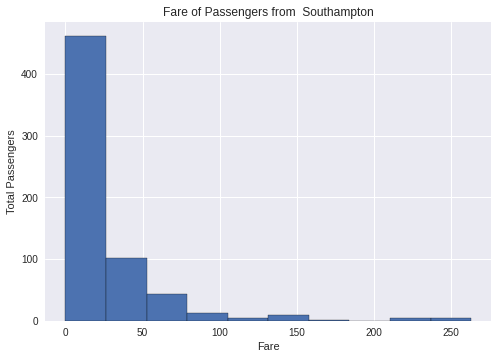

In [38]:
emb_s = tr.loc[(tr['Embarked'] == 'S'),'Fare']
plt.style.use('seaborn')
plt.hist(emb_s,  edgecolor ='black')
plt.title('Fare of Passengers from  Southampton')
plt.xlabel('Fare')
plt.ylabel('Total Passengers')

Text(0, 0.5, 'Total Passengers')

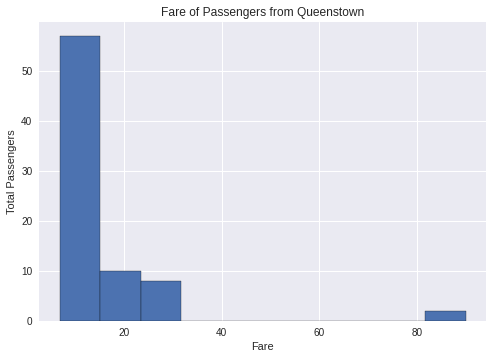

In [37]:
emb_q = tr.loc[(tr['Embarked'] == 'Q'),'Fare']
plt.style.use('seaborn')
plt.hist(emb_q,  edgecolor ='black')
plt.title('Fare of Passengers from Queenstown')
plt.xlabel('Fare')
plt.ylabel('Total Passengers')

Text(0, 0.5, 'Total Passengers')

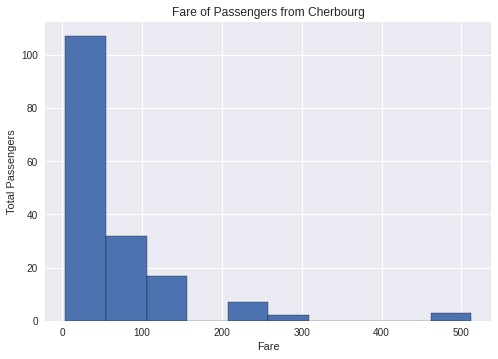

In [36]:
emb_c = tr.loc[(tr['Embarked'] == 'C'),'Fare']
plt.style.use('seaborn')
plt.hist(emb_c,  edgecolor ='black')
plt.title('Fare of Passengers from Cherbourg')
plt.xlabel('Fare')
plt.ylabel('Total Passengers')

### some Data is useless for example the ticket number

In [49]:
del tr['Ticket']

KeyError: 'Ticket'

In [47]:
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Viz of the correlate between the ticket price and the age of the passengers 

Text(0, 0.5, 'Fare')

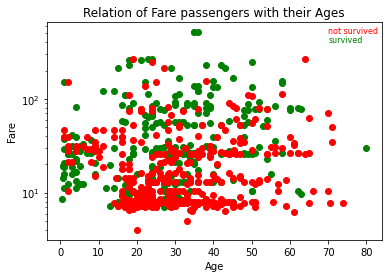

In [41]:
s = (tr['Survived'] == 1)
d = (tr['Survived'] == 0)
xs = tr.loc[s,'Age']
xd = tr.loc[d,'Age']

ys = tr.loc[s,'Fare']
yd = tr.loc[d,'Fare']

plt.annotate('not survived',(70, 500),color = 'red',size =8)
plt.annotate('survived',(70, 400),color = 'green',size =8)
plt.yscale('log')
plt.scatter(xs,ys, c = 'green')
plt.scatter(xd,yd, c ='red' )
plt.title('Relation of Fare passengers with their Ages')
plt.xlabel('Age')
plt.ylabel('Fare')


 from the previous graph, the passenger that hold more expensive ticket tend to have more chance to survive then those with cheap ticket

### Adding a column to the table that will show how many relatives sailed with the passenger on the ship, including himself

In [21]:
tr['Tot_rel'] = (tr['SibSp']+ tr['Parch'] + 1)
tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tot_rel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


### does the passenger that have more relative, tend to have more chance to survive?

does the passenger that have more relative, tend to have more chance to survive?

Text(0, 0.5, 'Total Passengers Survived')

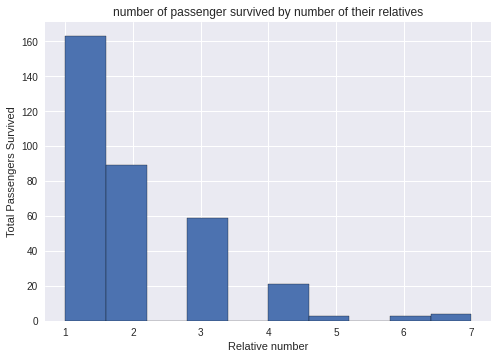

In [22]:
rel_s = tr['Survived'] == 1
rel_n = tr.loc[rel_s,'Tot_rel']

plt.style.use('seaborn')
plt.hist(rel_n,  edgecolor ='black')
plt.title('number of passenger survived by number of their relatives')
plt.xlabel('Relative number')
plt.ylabel('Total Passengers Survived')

from the previous graph we can conclude that the passenger who does not have relatives or less , he tends to have more chance to survive

### feature Normalization of the Age and Fare using  MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
MinMaxScaler().fit_transform(tr[['Age','Fare']])

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [       nan, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

### bar chart with 2 columns (number of survivors and non-survivors) versus the number of parents/children

Text(70, 400, 'survived')

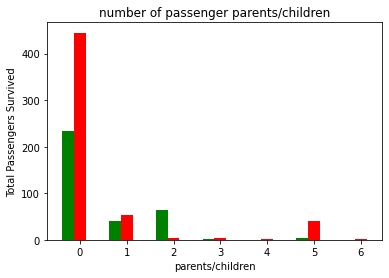

In [11]:
s = (tr['Survived'] == 1)
d = (tr['Survived'] == 0)

xs = tr.loc[s,'Parch'].unique()
ys = tr.loc[s,'Parch'].value_counts().values

xd = tr.loc[d,'Parch'].unique()
yd = tr.loc[d,'Parch'].value_counts().values

width = 0.25
plt.bar(xs - width,ys, width = width, color='green')
plt.bar(xd,yd, width = width, color='red')
plt.title('number of passenger parents/children')
plt.xlabel('parents/children')
plt.ylabel('Total Passengers Survived')
plt.annotate('not survived',(70, 500),color = 'red',size =8)
plt.annotate('survived',(70, 400),color = 'green',size =8)

from 1 to 3 (number od parents/children) (difference between survived and not survived passenter is decreasing ) the number passenger survived getting higher which is mean when u don't have any parent/children your chance to survive is about 35% but this percentage is get higher one you have more children/parents undless you have 5 or 6, then your chances is decreasing again

### plotting the age distribution  of surviving and non-surviving passengers for each ticket class

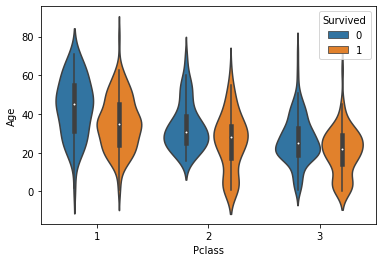

In [79]:

ax = sns.violinplot( x=tr['Pclass'], y = tr['Age'], hue = tr['Survived'], data =tr, kind = 'violin')
